In [1]:
import pandas as pd
import os
from pathlib import Path

# Set the directory containing CSV files
csv_file = Path("../mocap_data_20251208_170209.csv")

df = pd.read_csv(csv_file)
print(f"Loaded {csv_file}: {len(df)} rows")

# Combine all dataframes
print(f"\nTotal rows in  dataset: {len(df)}")
print(f"All columns: {list(df.columns)}")

Loaded ../mocap_data_20251208_170209.csv: 2695 rows

Total rows in  dataset: 2695
All columns: ['timestamp', 'x', 'y', 'z', 'roll', 'pitch', 'yaw', 'raw_message']


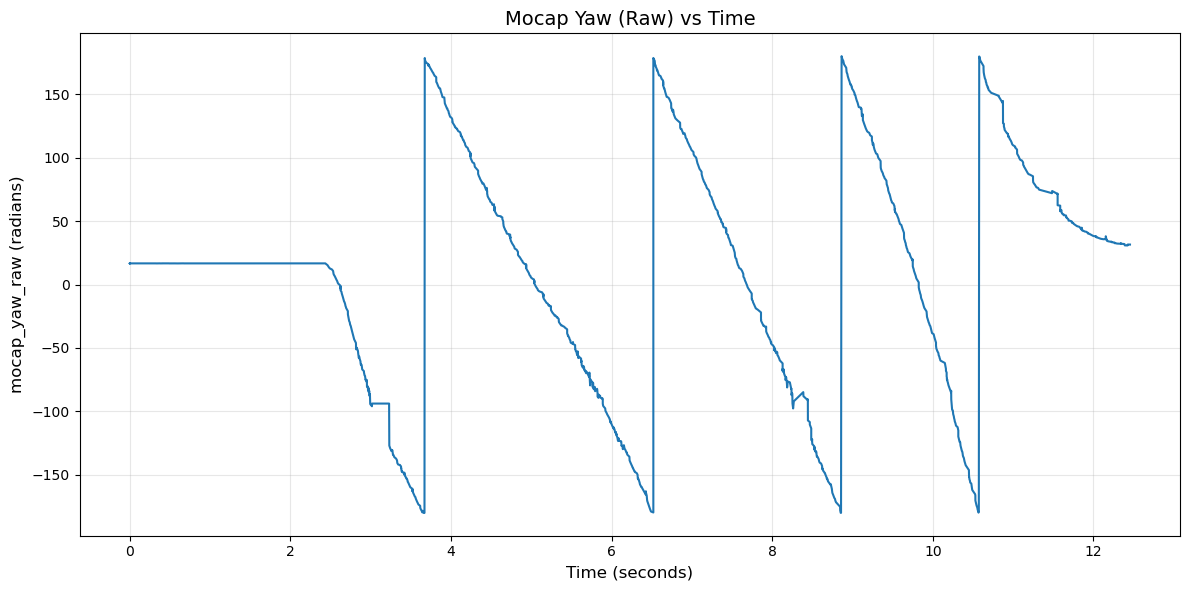

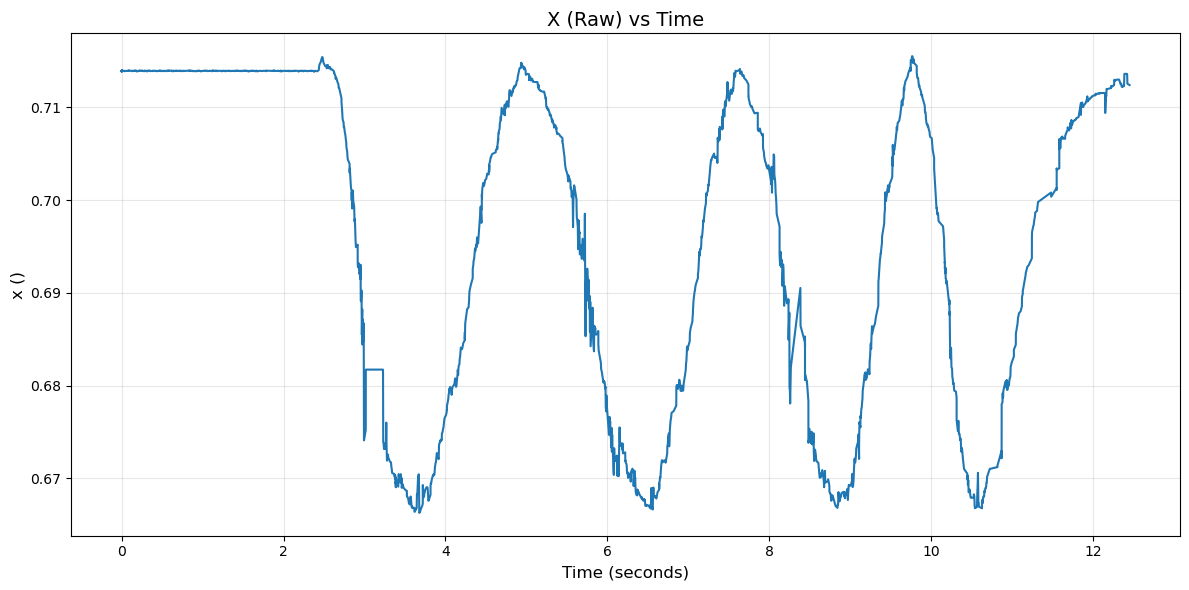

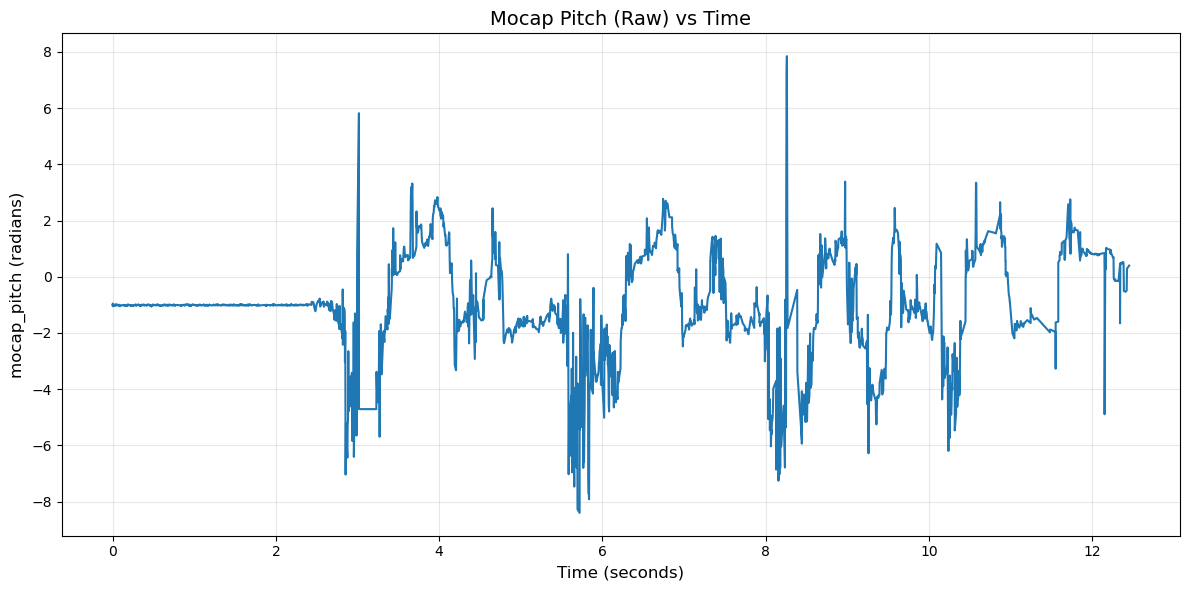

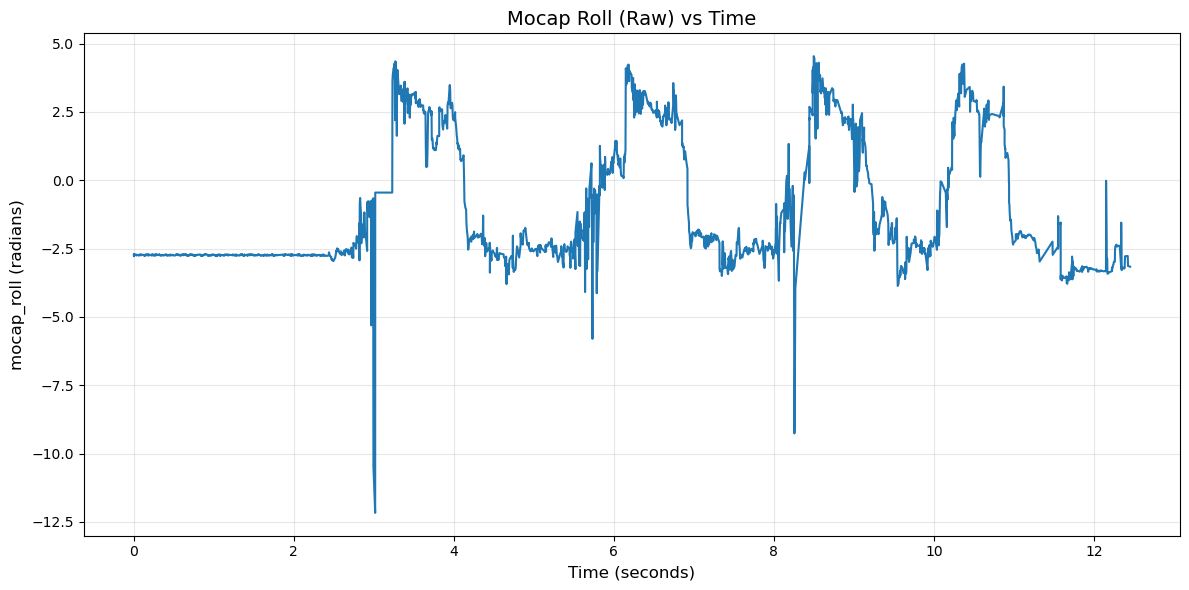

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp to ensure proper ordering
filtered_df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate elapsed time in seconds from the first timestamp
start_time = filtered_df['timestamp'].iloc[0]
filtered_df['elapsed_time'] = (filtered_df['timestamp'] - start_time).dt.total_seconds()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['yaw'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_yaw_raw (radians)', fontsize=12)
plt.title('Mocap Yaw (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()
# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['x'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('x ()', fontsize=12)
plt.title('X (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['pitch'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_pitch (radians)', fontsize=12)
plt.title('Mocap Pitch (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()
# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['roll'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('mocap_roll (radians)', fontsize=12)
plt.title('Mocap Roll (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()



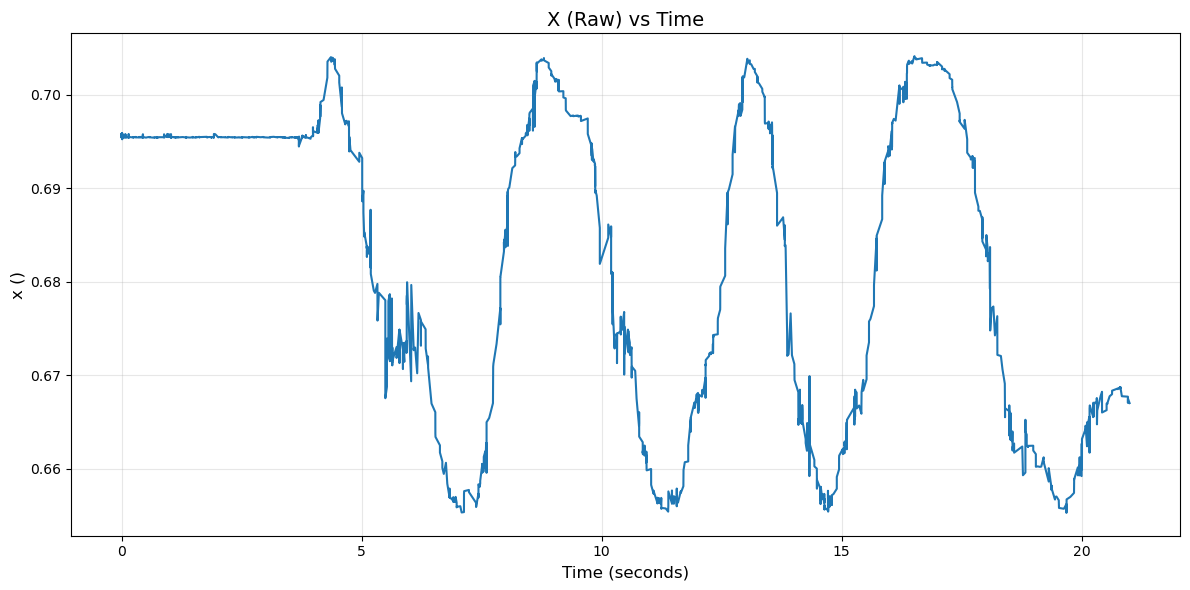

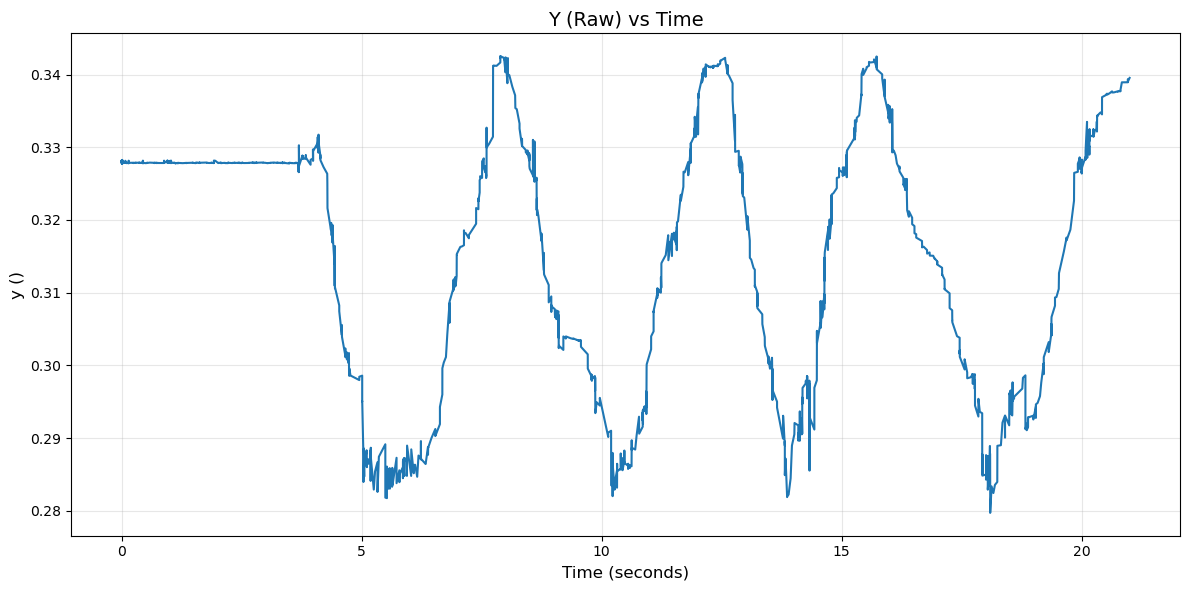

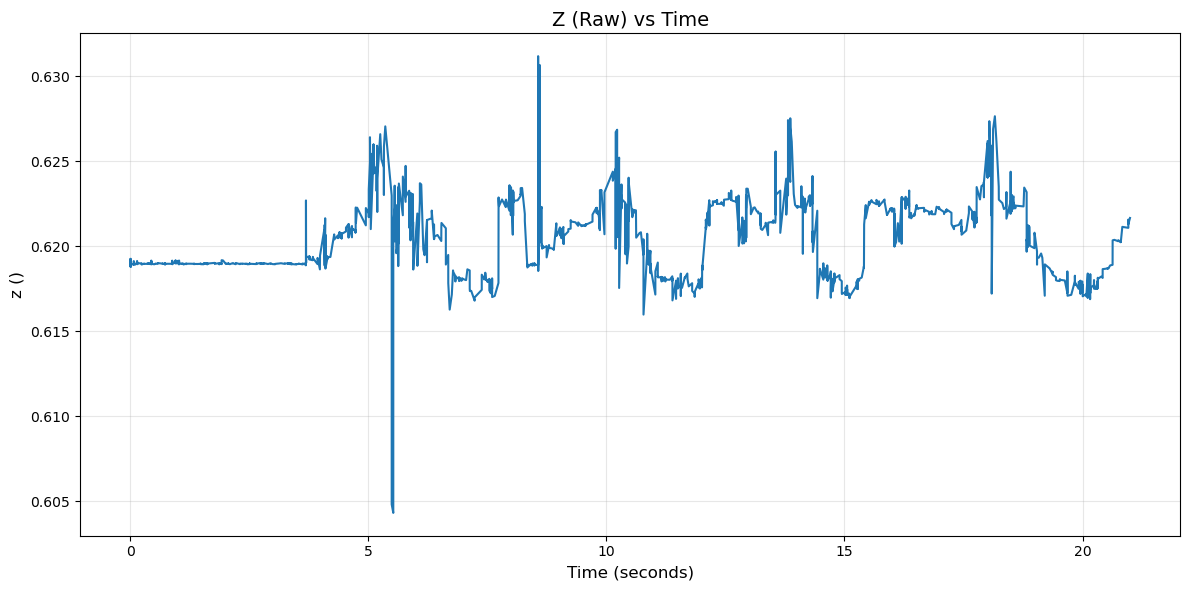

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp to ensure proper ordering
filtered_df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate elapsed time in seconds from the first timestamp
start_time = filtered_df['timestamp'].iloc[0]
filtered_df['elapsed_time'] = (filtered_df['timestamp'] - start_time).dt.total_seconds()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['x'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('x ()', fontsize=12)
plt.title('X (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()

# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['y'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('y ()', fontsize=12)
plt.title('Y (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()
# Plot mocap_yaw_raw vs time
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['elapsed_time'], filtered_df['z'], linewidth=1.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('z ()', fontsize=12)
plt.title('Z (Raw) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
#plt.ylim(-3.14, 3.14)  # For radians (roughly -π to π)
plt.tight_layout()
plt.show()



Loaded ../mocap_data_20251208_161046.csv: 6285 rows
Columns: ['timestamp                  ', 'x                  ', 'y                   ', 'z                  ', 'q_x                     ', 'q_y                     ', 'q_z                    ', 'q_w                    ', 'raw_message']


KeyError: 'timestamp'

Loaded ../mocap_data_20251208_164053.csv: 1076 rows
Columns: ['timestamp', 'x', 'y', 'z', 'q_x', 'q_y', 'q_z', 'q_w', 'heading', 'raw_message']

Heading statistics:
  Min: -3.1415 rad (-179.99°)
  Max: 3.1186 rad (178.68°)
  Mean: -1.3660 rad (-78.27°)


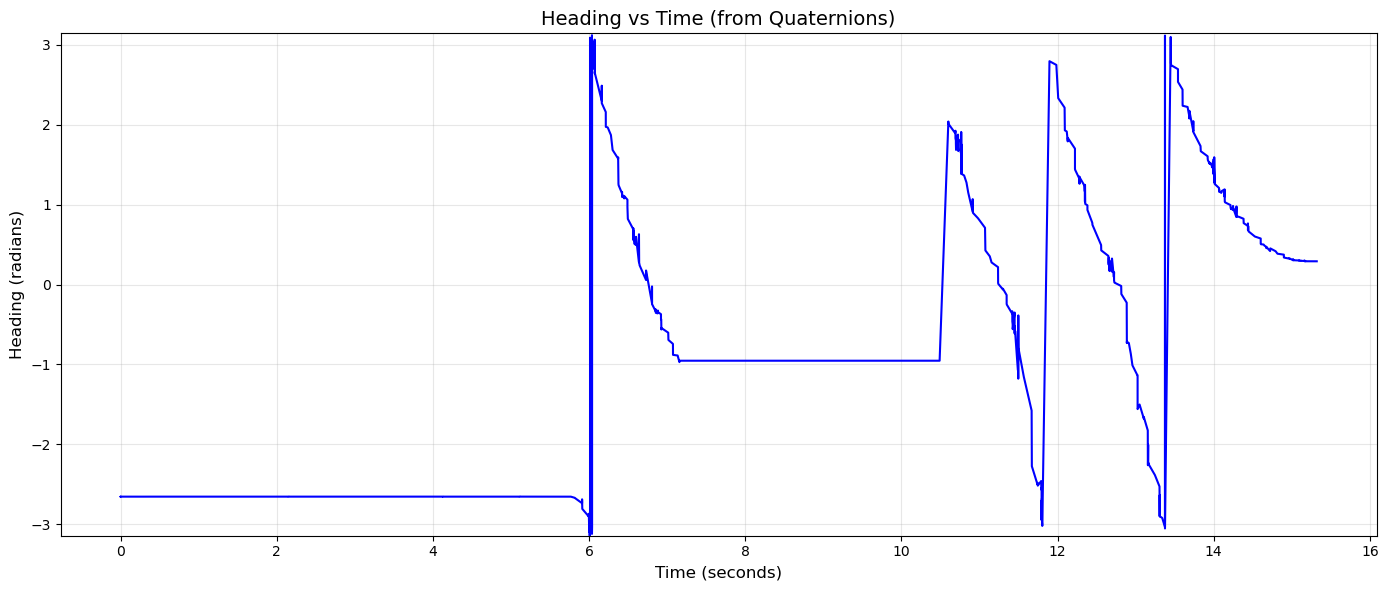

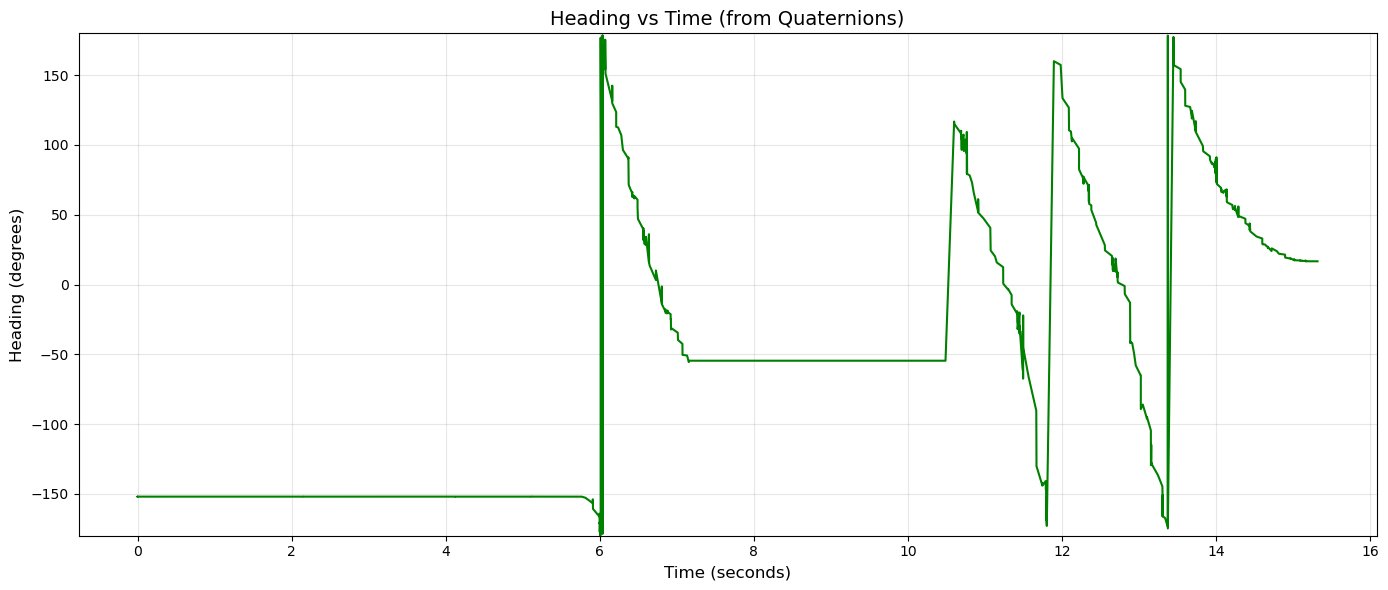

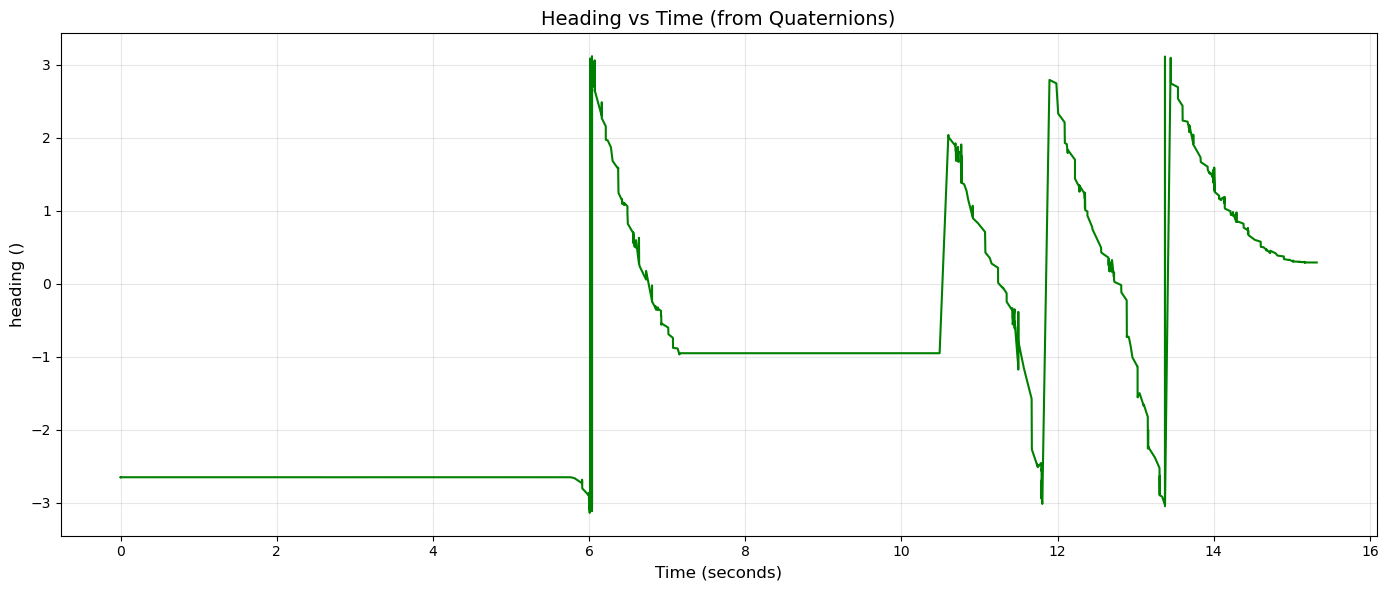


✓ Quaternion to heading conversion complete!
✓ Data ready to use. Access heading with: df['heading'] (radians) or df['heading_deg'] (degrees)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the CSV file with quaternion data
csv_file = Path("../mocap_data_20251208_164053.csv")
df = pd.read_csv(csv_file)

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

print(f"Loaded {csv_file}: {len(df)} rows")
print(f"Columns: {list(df.columns)}")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp to ensure proper ordering
df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate elapsed time in seconds from the first timestamp
start_time = df['timestamp'].iloc[0]
df['elapsed_time'] = (df['timestamp'] - start_time).dt.total_seconds()

# Convert quaternions to heading (yaw angle in radians)
# Quaternion format: (q_w, q_x, q_y, q_z)
# Formula for yaw: atan2(2*(w*z + x*y), 1 - 2*(y^2 + z^2))
df['heading'] = np.arctan2(
    2 * (df['q_w'] * df['q_z'] + df['q_x'] * df['q_y']),
    1 - 2 * (df['q_y']**2 + df['q_z']**2)
)

# Convert heading to degrees for easier interpretation
df['heading_deg'] = np.degrees(df['heading'])

print(f"\nHeading statistics:")
print(f"  Min: {np.min(df['heading']):.4f} rad ({np.min(df['heading_deg']):.2f}°)")
print(f"  Max: {np.max(df['heading']):.4f} rad ({np.max(df['heading_deg']):.2f}°)")
print(f"  Mean: {np.mean(df['heading']):.4f} rad ({np.mean(df['heading_deg']):.2f}°)")

# Plot heading vs time (in radians)
plt.figure(figsize=(14, 6))
plt.plot(df['elapsed_time'], df['heading'], linewidth=1.5, color='blue')
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Heading (radians)', fontsize=12)
plt.title('Heading vs Time (from Quaternions)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(-np.pi, np.pi)
plt.tight_layout()
plt.show()

# Plot heading vs time (in degrees)
plt.figure(figsize=(14, 6))
plt.plot(df['elapsed_time'], df['heading_deg'], linewidth=1.5, color='green')
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Heading (degrees)', fontsize=12)
plt.title('Heading vs Time (from Quaternions)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(-180, 180)
plt.tight_layout()
plt.show()
# Plot heading vs time (in degrees)
plt.figure(figsize=(14, 6))
plt.plot(df['elapsed_time'], df['heading'], linewidth=1.5, color='green')
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('heading ()', fontsize=12)
plt.title('Heading vs Time (from Quaternions)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\n✓ Quaternion to heading conversion complete!")
print(f"✓ Data ready to use. Access heading with: df['heading'] (radians) or df['heading_deg'] (degrees)")

